케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트 학습시키지 않은 테스트 데이터 hidden layer의 수 4, 8,16,32,64 : 46개 클래스에 적용하기 위하여32개정도

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000, test_split=0.5)

len(train_data), len(test_data)

#train_data[5]

(5614, 5614)

In [3]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
11/11 [==============================] - 2s 76ms/step - loss: 3.6782 - accuracy: 0.1977 - val_loss: 3.4668 - val_accuracy: 0.3554
Epoch 2/20
11/11 [==============================] - 0s 37ms/step - loss: 3.2731 - accuracy: 0.3522 - val_loss: 3.0964 - val_accuracy: 0.3554
Epoch 3/20
11/11 [==============================] - 0s 35ms/step - loss: 2.8894 - accuracy: 0.3522 - val_loss: 2.7465 - val_accuracy: 0.3554
Epoch 4/20
11/11 [==============================] - 0s 36ms/step - loss: 2.5295 - accuracy: 0.3541 - val_loss: 2.4384 - val_accuracy: 0.3616
Epoch 5/20
11/11 [==============================] - 0s 39ms/step - loss: 2.2403 - accuracy: 0.3787 - val_loss: 2.2165 - val_accuracy: 0.3970
Epoch 6/20
11/11 [==============================] - 0s 40ms/step - loss: 2.0177 - accuracy: 0.4644 - val_loss: 2.0500 - val_accuracy: 0.4904
Epoch 7/20
11/11 [==============================] - 0s 41ms/step - loss: 1.8425 - accuracy: 0.5346 - val_loss: 1.9236 - val_accuracy: 0.5315
Epoch 8/20
11

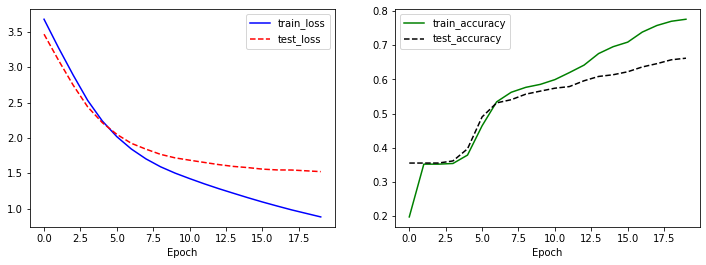

In [5]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [6]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
11/11 [==============================] - 1s 65ms/step - loss: 3.6454 - accuracy: 0.2556 - val_loss: 3.4037 - val_accuracy: 0.3278
Epoch 2/20
11/11 [==============================] - 0s 35ms/step - loss: 3.1255 - accuracy: 0.3279 - val_loss: 2.8969 - val_accuracy: 0.3290
Epoch 3/20
11/11 [==============================] - 0s 39ms/step - loss: 2.5713 - accuracy: 0.4605 - val_loss: 2.4169 - val_accuracy: 0.5219
Epoch 4/20
11/11 [==============================] - 0s 35ms/step - loss: 2.0744 - accuracy: 0.5969 - val_loss: 2.0430 - val_accuracy: 0.5944
Epoch 5/20
11/11 [==============================] - 0s 37ms/step - loss: 1.7018 - accuracy: 0.6511 - val_loss: 1.7879 - val_accuracy: 0.6181
Epoch 6/20
11/11 [==============================] - 0s 37ms/step - loss: 1.4392 - accuracy: 0.6781 - val_loss: 1.6290 - val_accuracy: 0.6315
Epoch 7/20
11/11 [==============================] - 0s 36ms/step - loss: 1.2590 - accuracy: 0.7002 - val_loss: 1.5247 - val_accuracy: 0.6471
Epoch 8/20
11

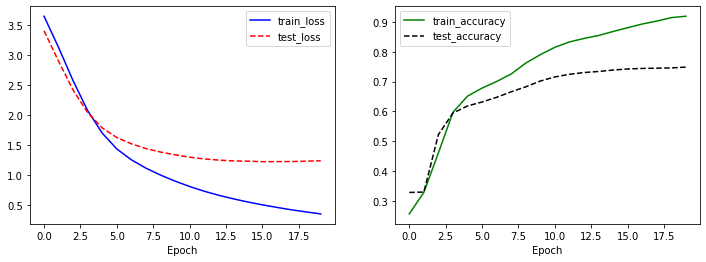

In [7]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [8]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
11/11 [==============================] - 1s 62ms/step - loss: 3.6726 - accuracy: 0.1103 - val_loss: 3.4374 - val_accuracy: 0.2166
Epoch 2/20
11/11 [==============================] - 0s 37ms/step - loss: 3.1692 - accuracy: 0.3465 - val_loss: 2.9287 - val_accuracy: 0.5549
Epoch 3/20
11/11 [==============================] - 0s 36ms/step - loss: 2.5840 - accuracy: 0.5990 - val_loss: 2.3746 - val_accuracy: 0.5951
Epoch 4/20
11/11 [==============================] - 0s 38ms/step - loss: 1.9865 - accuracy: 0.6402 - val_loss: 1.8820 - val_accuracy: 0.6363
Epoch 5/20
11/11 [==============================] - 0s 36ms/step - loss: 1.5160 - accuracy: 0.7077 - val_loss: 1.5578 - val_accuracy: 0.6936
Epoch 6/20
11/11 [==============================] - 0s 37ms/step - loss: 1.2050 - accuracy: 0.7595 - val_loss: 1.3787 - val_accuracy: 0.7173
Epoch 7/20
11/11 [==============================] - 0s 39ms/step - loss: 0.9987 - accuracy: 0.7994 - val_loss: 1.2760 - val_accuracy: 0.7358
Epoch 8/20
11

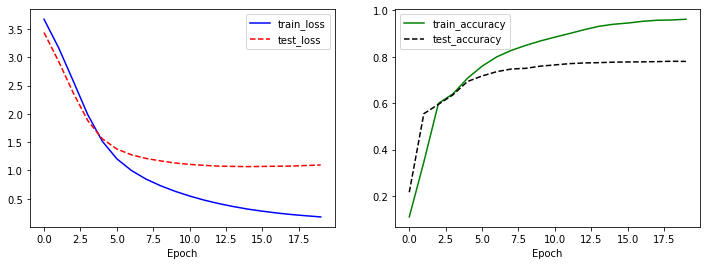

In [9]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [10]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
11/11 [==============================] - 1s 63ms/step - loss: 3.5591 - accuracy: 0.1081 - val_loss: 3.1989 - val_accuracy: 0.4385
Epoch 2/20
11/11 [==============================] - 0s 35ms/step - loss: 2.7948 - accuracy: 0.5609 - val_loss: 2.4359 - val_accuracy: 0.6265
Epoch 3/20
11/11 [==============================] - 0s 36ms/step - loss: 1.9916 - accuracy: 0.6744 - val_loss: 1.7975 - val_accuracy: 0.6706
Epoch 4/20
11/11 [==============================] - 0s 39ms/step - loss: 1.4351 - accuracy: 0.7100 - val_loss: 1.4754 - val_accuracy: 0.6911
Epoch 5/20
11/11 [==============================] - 0s 36ms/step - loss: 1.1249 - accuracy: 0.7553 - val_loss: 1.3108 - val_accuracy: 0.7132
Epoch 6/20
11/11 [==============================] - 0s 37ms/step - loss: 0.9275 - accuracy: 0.8012 - val_loss: 1.2202 - val_accuracy: 0.7305
Epoch 7/20
11/11 [==============================] - 0s 41ms/step - loss: 0.7778 - accuracy: 0.8343 - val_loss: 1.1571 - val_accuracy: 0.7456
Epoch 8/20
11

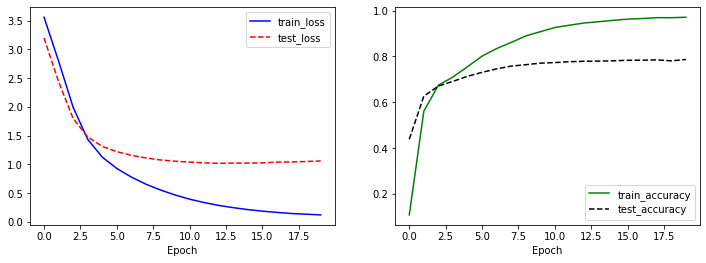

In [11]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [12]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
11/11 [==============================] - 1s 61ms/step - loss: 3.5339 - accuracy: 0.3659 - val_loss: 3.0641 - val_accuracy: 0.4768
Epoch 2/20
11/11 [==============================] - 0s 36ms/step - loss: 2.5555 - accuracy: 0.5301 - val_loss: 2.1384 - val_accuracy: 0.5613
Epoch 3/20
11/11 [==============================] - 0s 38ms/step - loss: 1.7699 - accuracy: 0.6511 - val_loss: 1.6535 - val_accuracy: 0.6760
Epoch 4/20
11/11 [==============================] - 0s 36ms/step - loss: 1.3599 - accuracy: 0.7314 - val_loss: 1.4218 - val_accuracy: 0.7063
Epoch 5/20
11/11 [==============================] - 0s 36ms/step - loss: 1.1019 - accuracy: 0.7716 - val_loss: 1.2853 - val_accuracy: 0.7237
Epoch 6/20
11/11 [==============================] - 0s 39ms/step - loss: 0.9081 - accuracy: 0.8058 - val_loss: 1.1880 - val_accuracy: 0.7417
Epoch 7/20
11/11 [==============================] - 0s 37ms/step - loss: 0.7412 - accuracy: 0.8514 - val_loss: 1.1134 - val_accuracy: 0.7606
Epoch 8/20
11

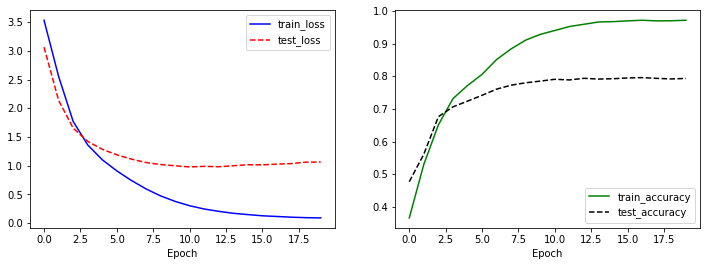

In [13]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [5]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = one_hot_train_labels
y_test = one_hot_test_labels 

history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
11/11 [==============================] - 1s 75ms/step - loss: 3.5035 - accuracy: 0.3495 - val_loss: 2.9626 - val_accuracy: 0.5825
Epoch 2/20
11/11 [==============================] - 0s 40ms/step - loss: 2.4693 - accuracy: 0.5702 - val_loss: 2.0631 - val_accuracy: 0.5825
Epoch 3/20
11/11 [==============================] - 0s 39ms/step - loss: 1.6920 - accuracy: 0.6580 - val_loss: 1.5577 - val_accuracy: 0.6746
Epoch 4/20
11/11 [==============================] - 0s 38ms/step - loss: 1.2691 - accuracy: 0.7305 - val_loss: 1.3290 - val_accuracy: 0.7123
Epoch 5/20
11/11 [==============================] - 0s 42ms/step - loss: 1.0118 - accuracy: 0.7854 - val_loss: 1.2006 - val_accuracy: 0.7414
Epoch 6/20
11/11 [==============================] - 0s 44ms/step - loss: 0.8148 - accuracy: 0.8322 - val_loss: 1.1113 - val_accuracy: 0.7576
Epoch 7/20
11/11 [==============================] - 0s 41ms/step - loss: 0.6520 - accuracy: 0.8618 - val_loss: 1.0531 - val_accuracy: 0.7674
Epoch 8/20
11

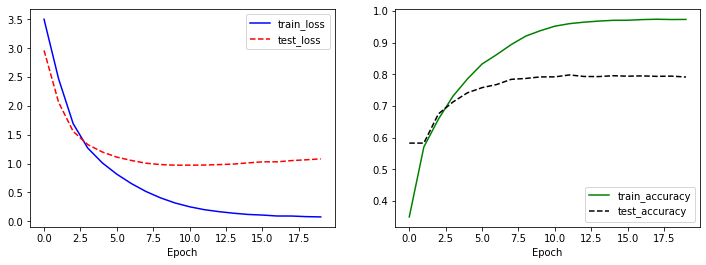

In [6]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


epochs=range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss, 'b-', label='train_loss')
plt.plot(val_loss, 'r--', label='test_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, 'g-', label='train_accuracy')
plt.plot(val_acc, 'k--', label='test_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()